# 计算流体力学 第三次作业
> 2100011025 王奕博

## 第一问
> 验证格式的稳定性条件，观察到发散现象。

在此，我选择Lax-Wendroff格式、Lax格式和一阶迎风格式，分别计算其数值解，并分别通过选取收敛域内和收敛域外的$\Delta x$和$\Delta t$，观察了格式的收敛和发散。

此外，我将计算结果绘制成热力图，并将其与解析解相比较的误差也绘制成热力图，结果可见下面代码的输出结果。

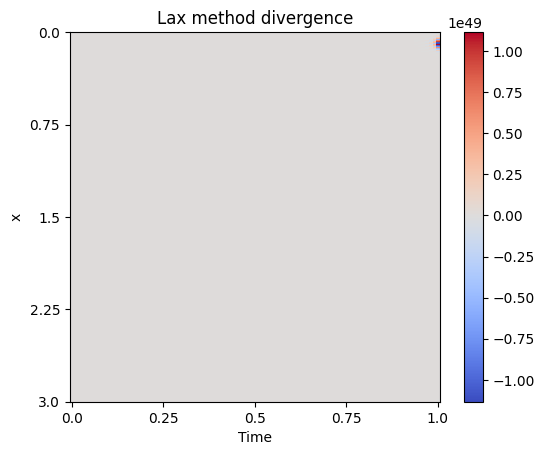

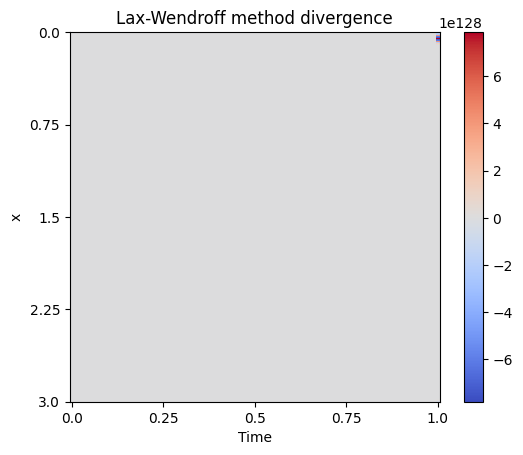

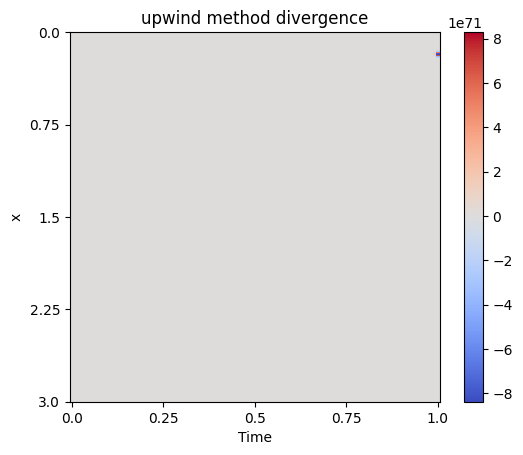

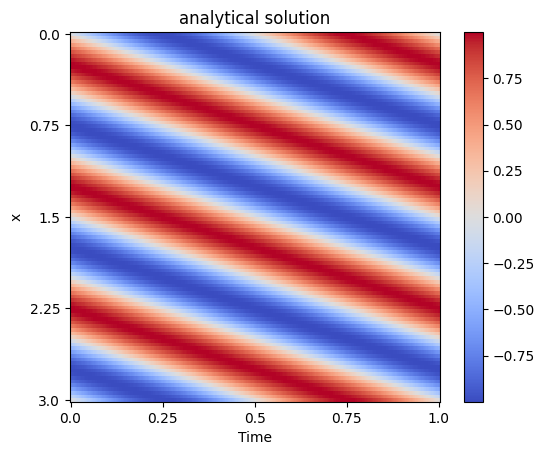

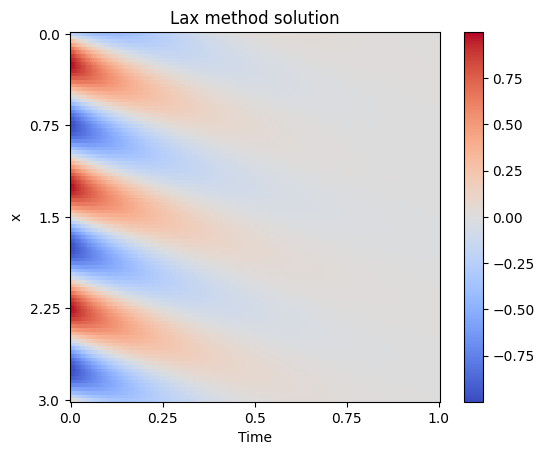

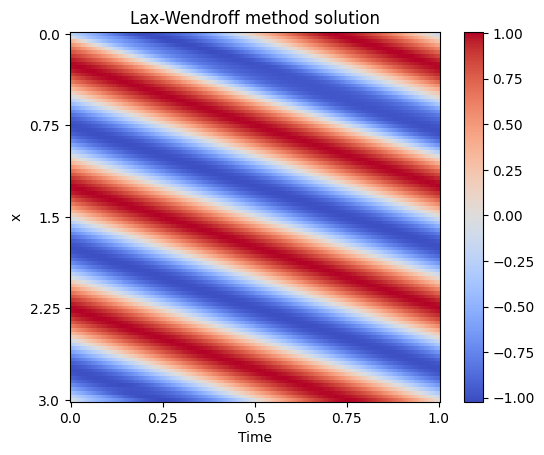

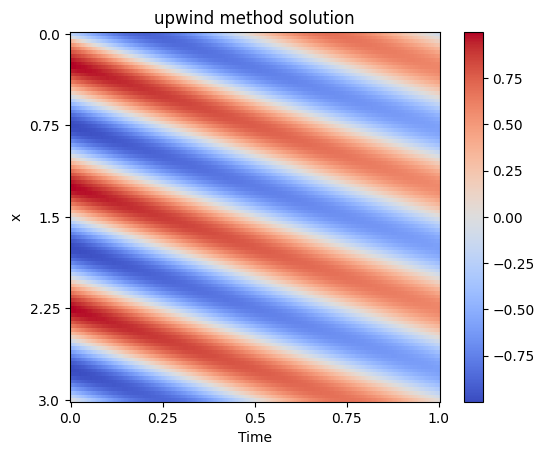

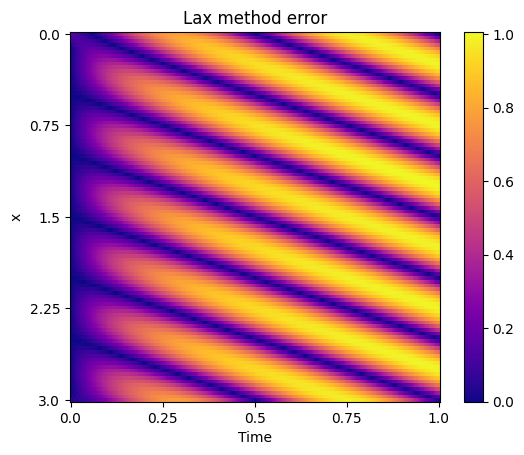

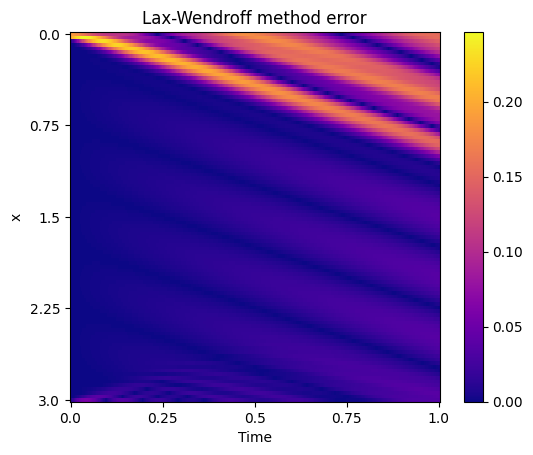

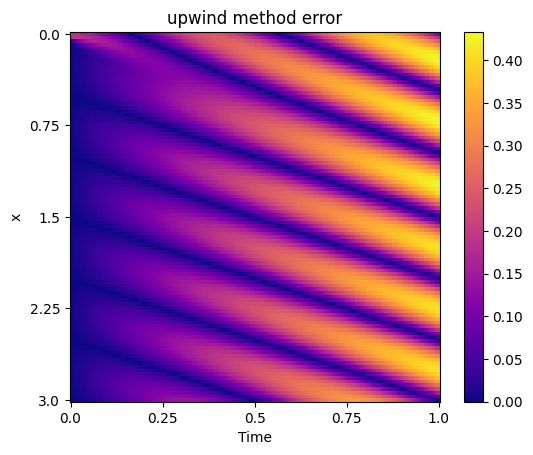

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 使用Lax-Wendroff格式进行计算


def lax_wen(Nx, Nt, is_complex=False):
    if is_complex:
        u = np.zeros((Nt, Nx), dtype=complex)
        u[0, :] = np.exp(1j*(2*np.pi*np.linspace(0, 3, Nx)-np.pi/2))
    else:
        u = np.zeros((Nt, Nx))
        u[0, :] = np.sin(2*np.pi*np.linspace(0, 3, Nx))
    u[0, 0] = u[0, -2]
    u[0, 1] = u[0, -1]
    dx = 3/(Nx-1)
    dt = 1/(Nt-1)
    for n in range(Nt-1):
        for i in range(1, Nx-1):
            u[n+1, i] = u[n, i] - 0.5*(dt/dx)*(u[n, i+1] - u[n, i-1]) + \
                0.5*(dt/dx)**2*(u[n, i+1] - 2*u[n, i] + u[n, i-1])
        u[n+1, 0] = u[n+1, -2]
        u[n+1, -1] = u[n+1, 1]
    return u


# 使用一阶迎风格式进行计算
def upwind(Nx, Nt, is_complex=False):
    if is_complex:
        u = np.zeros((Nt, Nx), dtype=complex)
        u[0, :] = np.exp(1j*(2*np.pi*np.linspace(0, 3, Nx)-np.pi/2))
    else:
        u = np.zeros((Nt, Nx))
        u[0, :] = np.sin(2*np.pi*np.linspace(0, 3, Nx))
    u[0, 0] = u[0, -2]
    u[0, 1] = u[0, -1]
    dx = 3/(Nx-1)
    dt = 1/(Nt-1)
    for n in range(Nt-1):
        for i in range(1, Nx-1):
            u[n+1, i] = u[n, i] - (dt/dx)*(u[n, i] - u[n, i-1])
        u[n+1, 0] = u[n+1, -2]
        u[n+1, -1] = u[n+1, 1]
    return u


# 使用Lax格式进行计算
def lax(Nx, Nt, is_complex=False):
    if is_complex:
        u = np.zeros((Nt, Nx), dtype=complex)
        u[0, :] = np.exp(1j*(2*np.pi*np.linspace(0, 3, Nx)-np.pi/2))
    else:
        u = np.zeros((Nt, Nx))
        u[0, :] = np.sin(2*np.pi*np.linspace(0, 3, Nx))
    u[0, 0] = u[0, -2]
    u[0, 1] = u[0, -1]
    dx = 3/(Nx-1)
    dt = 1/(Nt-1)
    for n in range(Nt-1):
        for i in range(1, Nx-1):
            u[n+1, i] = 0.5*(u[n, i+1]+u[n, i-1]) - 0.5 * \
                (dt/dx)*(u[n, i+1]-u[n, i-1])
        u[n+1, 0] = u[n+1, -2]
        u[n+1, -1] = u[n+1, 1]
    return u

# 绘制热力图的程序


def paint(u: np.array, name: str, color='viridis'):
    aspect_ratio = float(u.T.shape[1]) / u.T.shape[0]
    plt.imshow(u.T, cmap=color,
               interpolation='nearest', aspect=aspect_ratio)
    plt.colorbar()
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('x')
    plt.xticks(np.linspace(0, u.shape[0]-1,
               num=5), np.linspace(0.0, 1.0, num=5))
    plt.yticks(np.linspace(0, u.shape[1]-1,
               num=5), np.linspace(0.0, 3.0, num=5))
    plt.savefig("./HW3_fig/"+name.replace(" ", "_")+".png")
    plt.show()

# 返回在使用(Nx,Nt)划分区域时，每个点上的解析解的值。


def real(Nx, Nt, is_complex=False):
    u = np.zeros((Nt, Nx), dtype=complex) if is_complex else np.zeros((Nt, Nx))
    dx = 3/(Nx-1)
    dt = 1/(Nt-1)
    for n in range(Nt):
        for i in range(Nx):
            X = i*dx
            T = n*dt
            if is_complex:
                u[n, i] = np.exp(1j*(2*np.pi*(X-T)-np.pi/2))
            else:
                u[n, i] = np.sin(2*np.pi*(X-T))
    return u


# 观察发散现象
nx = 1000
nt = 100
u_lw = lax_wen(nx, nt)
u_up = upwind(nx, nt)
u_lax = lax(nx, nt)

paint(u_lax, "Lax method divergence", "coolwarm")
paint(u_lw, "Lax-Wendroff method divergence", "coolwarm")
paint(u_up, "upwind method divergence", "coolwarm")

# 观察收敛的结果
nx = 100
nt = 300
u_real = real(nx, nt)
u_lw = lax_wen(nx, nt)
u_up = upwind(nx, nt)
u_lax = lax(nx, nt)

# 绘制收敛的解
paint(u_real, "analytical solution", "coolwarm")
paint(u_lax, "Lax method solution", "coolwarm")
paint(u_lw, "Lax-Wendroff method solution", "coolwarm")
paint(u_up, "upwind method solution", "coolwarm")

# 绘制误差热力图
paint(np.abs(u_lax-u_real), "Lax method error", "plasma")
paint(np.abs(u_lw-u_real), "Lax-Wendroff method error", "plasma")
paint(np.abs(u_up-u_real), "upwind method error", "plasma")

## 第二问
> 验证格式的精度阶数。
在此，我分别从时间精度和空间精度进行验证。

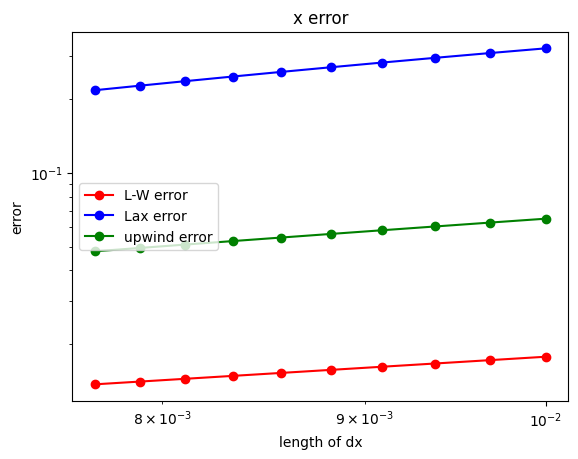

In [10]:
# 测试三种格式随着dx长度增长时，误差的变化
x_list = list(range(300, 400, 10))  # 划分x轴的点的个数
err_x_lw = []
err_x_lax = []
err_x_up = []
for nnx in x_list:
    u_lw = lax_wen(nnx, 600)
    u_up = upwind(nnx, 600)
    u_lax = lax(nnx, 600)
    u_real = real(nnx, 600)
    # 采用二范数||error||_2
    err_x_lw.append(np.sqrt(np.mean((u_lw-u_real)**2)))
    err_x_up.append(np.sqrt(np.mean((u_up-u_real)**2)))
    err_x_lax.append(np.sqrt(np.mean((u_lax-u_real)**2)))
dx_list = np.array([3/i for i in x_list])

# 将结果绘制在双对数坐标轴上
plt.loglog(dx_list, np.array(err_x_lw), "-ro", label="L-W error")
plt.loglog(dx_list, np.array(err_x_lax), "-bo", label="Lax error")
plt.loglog(dx_list, np.array(err_x_up), "-go", label="upwind error")

plt.title('x error')
plt.xlabel('length of dx')
plt.ylabel('error')
plt.legend()
plt.savefig("./HW3_fig/x_error.png")
plt.show()

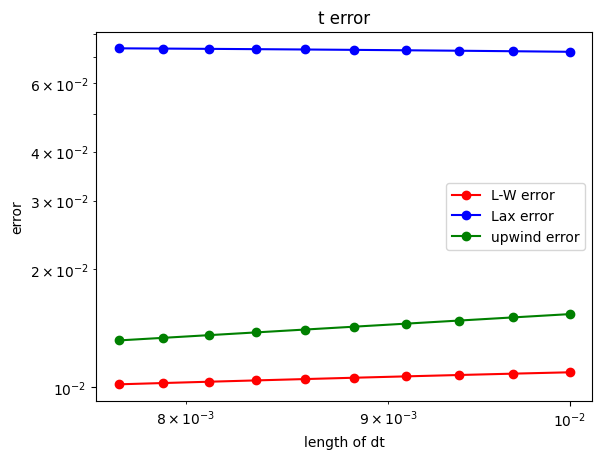

In [11]:
# 测试三种格式随着dt长度增长时，误差的变化
t_list = list(range(500, 700, 20))
err_t_lw = []
err_t_lax = []
err_t_up = []
for nnt in t_list:
    u_lw = lax_wen(300, nnt)
    u_up = upwind(300, nnt)
    u_lax = lax(300, nnt)
    u_real = real(300, nnt)
    err_t_lw.append(np.sqrt(np.mean((u_lw[:100, :]-u_real[:100, :])**2)))
    err_t_up.append(np.sqrt(np.mean((u_up[:100, :]-u_real[:100, :])**2)))
    err_t_lax.append(np.sqrt(np.mean((u_lax[:100, :]-u_real[:100, :])**2)))
dt_list = np.array([3/i for i in t_list])

plt.loglog(dx_list, np.array(err_t_lw), "-ro", label="L-W error")
plt.loglog(dx_list, np.array(err_t_lax), "-bo", label="Lax error")
plt.loglog(dx_list, np.array(err_t_up), "-go", label="upwind error")

plt.title('t error')
plt.xlabel('length of dt')
plt.ylabel('error')
plt.legend()
plt.savefig("./HW3_fig/t_error.png")
plt.show()

## 第三问
> 观察数值解的耗散以及相位的超前和滞后。
数值解的耗散可以通过第一问绘制的热力图观察，这里我主要观察相位的超前和滞后。

我将格式的作用对象改为复数，解析解也写成复数形式，以此观察两者相位之差，并将结果绘制在热力图上。

在热力图上，相位超前会显示红色，相位滞后会显示蓝色，以此可以容易观察出三种格式的相位超前与滞后。

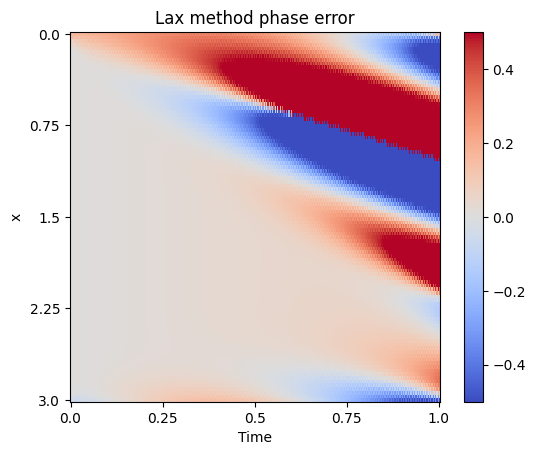

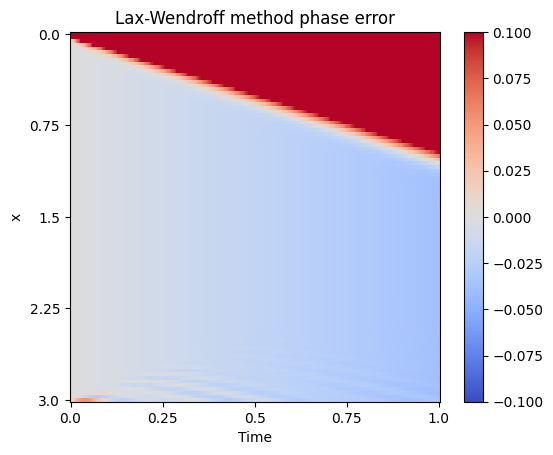

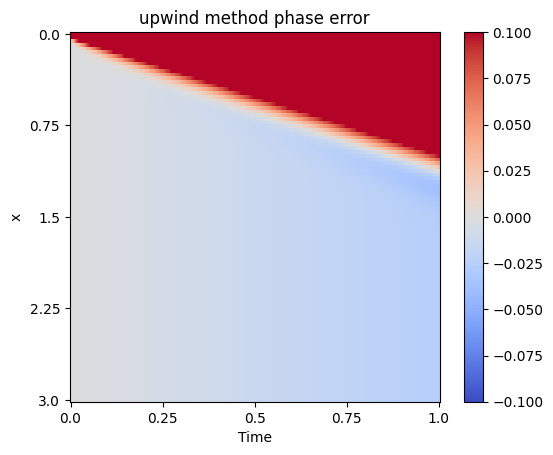

In [12]:
nx = 100
nt = 300
# 带入复数格式进行格式的计算
u_real = real(nx, nt, is_complex=True)
u_lw = lax_wen(nx, nt, is_complex=True)
u_up = upwind(nx, nt, is_complex=True)
u_lax = lax(nx, nt, is_complex=True)

# 计算两个复数的夹角，使用arctan2以保证结果稳定

def angle(z1, z2):
    arg_z1 = np.angle(z1)
    arg_z2 = np.angle(z2)
    cos_angle = np.cos(arg_z2 - arg_z1)
    sin_angle = np.sin(arg_z2 - arg_z1)
    return np.arctan2(sin_angle, cos_angle)

# 绘制相位差的热力图


def paint_angle(u: np.array, name: str, color='coolwarm', figrange=1):
    aspect_ratio = float(u.T.shape[1]) / u.T.shape[0]
    plt.imshow(u.T, cmap=color,
               interpolation='nearest', aspect=aspect_ratio, vmin=-figrange, vmax=figrange)
    plt.colorbar()
    plt.title(name)
    plt.xlabel('Time')
    plt.ylabel('x')
    plt.xticks(np.linspace(0, u.shape[0]-1,
               num=5), np.linspace(0.0, 1.0, num=5))
    plt.yticks(np.linspace(0, u.shape[1]-1,
               num=5), np.linspace(0.0, 3.0, num=5))
    plt.savefig("./HW3_fig/"+name.replace(" ", "_")+".png")
    plt.show()


paint_angle(angle(u_lax, u_real), "Lax method phase error", figrange=0.5)
paint_angle(angle(u_lw, u_real),
            "Lax-Wendroff method phase error", figrange=0.1)
paint_angle(angle(u_up, u_real), "upwind method phase error", figrange=0.1)